In [1]:
import numpy as np
import scipy.stats
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance
from utils import product_of_gaussians, gibbs_sampler_for_binary_tree,  W2_distance, gibbs_sampler_for_circle

In [2]:
# def product_of_gaussians(means, covariances):
#     """
#     Compute the product of multidimensional Gaussian distributions.

#     Parameters:
#     - means: List of mean vectors for each Gaussian distribution.
#     - covariances: List of covariance matrices for each Gaussian distribution.

#     Returns:
#     - mean_product: Mean vector of the product Gaussian distribution.
#     - covariance_product: Covariance matrix of the product Gaussian distribution.
#     """

#     # Check if the number of distributions is consistent
#     if len(means) != len(covariances):
#         raise ValueError("Number of means and covariances must be the same.")

#     # Initialize variables for the product distribution
#     precision_product = np.zeros_like(covariances[0])

#     # Compute precision matrix of the product distribution
#     for covariance_inv in map(np.linalg.inv, covariances):
#         precision_product += covariance_inv

#     covariance_product = np.linalg.inv(precision_product)

#     # Compute mean of the product distribution
#     mean_product = covariance_product @ sum(np.linalg.inv(covariance) @ mean for mean, covariance in zip(means, covariances))

#     return mean_product, covariance_product


# def TV_estimation(sampleX, sampleY, bin_num):

#     histX, bin_edges_X = np.histogram(sampleX, bins=bin_num, density=True)
#     histY, bin_edges_Y = np.histogram(sampleY, bins=bin_num, density=True)
#     # Calculate the L1 distance estimate
#     def l1_distance(x):
#         index = np.searchsorted(bin_edges_X, x, side='left')
#         if index == 0 or index == bin_num+1:
#             s_x = 0
#         else:
#             s_x = histX[np.searchsorted(bin_edges_X, x, side='left')-1]

#         index = np.searchsorted(bin_edges_Y, x, side='left')
#         if index == 0 or index == bin_num+1:
#             f_x = 0
#         else:
#             f_x = histY[np.searchsorted(bin_edges_Y, x, side='left')-1]
#         return np.abs( s_x - f_x )
#     bins = np.unique(np.concatenate((bin_edges_X,bin_edges_Y)))
#     lower_bound = np.min(bins)
#     upper_bound = np.max(bins)

#     distance, _ = quad(l1_distance, lower_bound, upper_bound, epsabs = 1e-3, points = bins, limit = (bin_num+1)*2)
#     return distance/2

# def generate_positive_semidefinite_matrix(dim):
#     # Generate a random matrix
#     random_matrix = np.random.rand(dim, dim)

#     # Compute its covariance matrix
#     covariance_matrix = np.cov(random_matrix, rowvar=False)

#     # Ensure positive semi-definite by using Cholesky decomposition
#     cholesky_factor = np.linalg.cholesky(covariance_matrix + np.eye(dim)*0.1)
#     positive_semidefinite_matrix = cholesky_factor.T @ cholesky_factor
#     eigenvalues, _ = np.linalg.eigh(positive_semidefinite_matrix)
#     ratio = max(eigenvalues) / min(eigenvalues)
#     print(ratio)
#     return positive_semidefinite_matrix

# def even_odd_layer(num_distributions):
#     even_list = []
#     odd_list = []
#     for i in range(num_distributions):
#         layer = math.floor(math.log2(i+1))
#         if layer % 2 == 0:
#             even_list.append(i)
#         else:
#             odd_list.append(i)
#     return even_list, odd_list

# def process_node(node, means, covariances, samples, i, num_nodes, cov_connection):
#     parent = (node - 1) // 2
#     left_child = 2 * node + 1
#     right_child = 2 * node + 2

#     temp_means = [means[node]]
#     temp_covs = [covariances[node]]

#     if node != 0:
#         temp_means.append(samples[i - 1, parent, :])
#         temp_covs.append(cov_connection)

#     if left_child < num_nodes:
#         temp_means.append(samples[i - 1, left_child, :])
#         temp_covs.append(cov_connection)

#     if right_child < num_nodes:
#         temp_means.append(samples[i - 1, right_child, :])
#         temp_covs.append(cov_connection)

#     new_mean, new_cov = product_of_gaussians(temp_means, temp_covs)
#     return new_mean, new_cov

# def gibbs_sampler_for_binary_tree(num_dimensions, num_iterations, n_layers, means, covariances):
#     num_nodes = 2 ** n_layers - 1
#     even_list, odd_list = even_odd_layer(num_nodes)
    
#     # Initialize samples with zeros
#     samples = np.zeros([num_iterations, num_nodes, num_dimensions])

#     for node in even_list:
#         samples[0, node, :] = np.random.multivariate_normal(np.zeros(num_dimensions),np.identity(num_dimensions), size=1)

#     cov_connection = 3 * eta * np.identity(num_dimensions)  # Make sure eta is defined

#     for i in range(1, num_iterations):
#         if i % 10000 == 0:
#             print(i)

#         for node in odd_list:
#             new_mean, new_cov = process_node(node, means, covariances, samples, i, num_nodes, cov_connection)
#             samples[i, node, :] = np.random.multivariate_normal(new_mean, new_cov, size=1)
                
#         for node in even_list:
#             new_mean, new_cov = process_node(node, means, covariances, samples, i+1, num_nodes, cov_connection)
#             samples[i, node, :] = np.random.multivariate_normal(new_mean, new_cov, size=1)
#     return samples

# def detect(array,thres):
#     flag = -1
#     for i in range(len(array)):
#         if array[i] <= thres and flag == -1:
#             flag = i
#         if array[i] > thres :
#             flag = -1
#     return flag

# # detect the first time that array is smaller than thres. If not detected, return -1.
# def weak_detect(array,thres):
#     for i in range(len(array)):
#         if array[i] <= thres:
#             return i
#     return -1

# def W2_distance(emMean, emCov, trueMean, trueCov):
#     return np.sqrt(np.linalg.norm(emMean - trueMean, ord=2) ** 2 +
#                    np.trace(emCov + trueCov - 2 * scipy.linalg.sqrtm(scipy.linalg.sqrtm(emCov) @ trueCov @ scipy.linalg.sqrtm(emCov))))


In [15]:
# ablation study on n, perfect binnary tree
num_iterations = 40
num_samples = 100
num_dimensions = 5
num_seeds = 5

W2s = np.zeros([num_seeds, 4, num_iterations])
slopes = np.zeros([num_seeds,4])
min_W2 = np.zeros([num_seeds,4])
for seed in range(num_seeds):
    np.random.seed(seed)
    for num_layers in [3,4,5,6]:
        eta = 0.05
        num_distributions = 2 ** num_layers - 1
        means = [1 + np.zeros(num_dimensions) for _ in range(num_distributions)]
        covariances = [np.identity(num_dimensions) for _ in range(num_distributions)]
        overall_mean, overall_cov = product_of_gaussians(means,covariances)
        final_samples = np.zeros([num_iterations,num_samples, num_dimensions])
        for sample_index in range(num_samples):
            samples = gibbs_sampler_for_binary_tree(num_dimensions, num_iterations, num_layers, means, covariances, eta)
            final_samples[:,sample_index,:] = samples[:,0,:]
        w2s_temp = []
        for iteraion_index in range(num_iterations):
            current_samples = final_samples[iteraion_index, :,:]
            # estimate the mean here
            emMean = np.mean(current_samples, axis = 0)
            emCov = EmpiricalCovariance(assume_centered=False).fit(current_samples).covariance_
            w2s_temp.append(W2_distance(emMean, emCov, overall_mean,overall_cov) )
        W2s[seed,int(num_layers-3),:] = w2s_temp
        slope, intercept = np.polyfit( list(range(len(w2s_temp))), np.log(w2s_temp), 1)
        slopes[seed,int(num_layers-3)] = slope
        min_W2[seed,int(num_layers-3)] = min(w2s_temp)

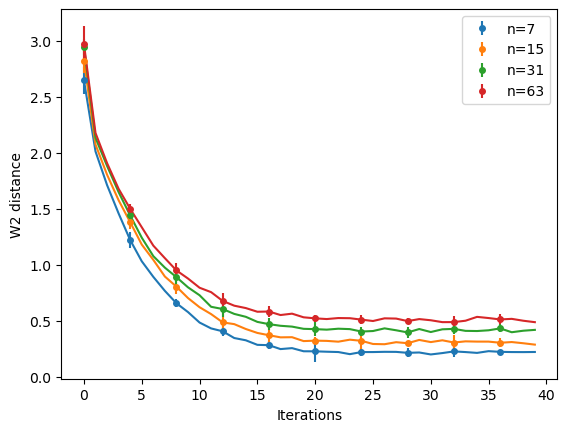

layers:3, mean_slope:-0.054207375686434224
layers:3, 2_std_slope:0.002789704123399596
layers:4, mean_slope:-0.04693504718711302
layers:4, 2_std_slope:0.0016822347334399473
layers:5, mean_slope:-0.039072135156919166
layers:5, 2_std_slope:0.002278547485886301
layers:6, mean_slope:-0.03416172134762508
layers:6, 2_std_slope:0.0011947449202341176
layers:3, mean_min_W2:0.16955548719127891
layers:3, 2_std_min_W2:0.043259435413363106
layers:4, mean_min_W2:0.2701785054893898
layers:4, 2_std_min_W2:0.0202612873418887
layers:5, mean_min_W2:0.3761939924206677
layers:5, 2_std_min_W2:0.024372434395941233
layers:6, mean_min_W2:0.4570046355049827
layers:6, 2_std_min_W2:0.034940463752629436


In [20]:
np.save('w2s_tree_Gibbs.npy',W2s)
mean_W2s = np.mean(W2s, axis=0)
std_W2s = np.std(W2s, axis=0)
index = np.arange(0, num_iterations, 4)
for layer in [3,4,5,6]:
    num_nodes = 2 ** layer -1
    line, = plt.plot(mean_W2s[int(layer-3),:])
    plt.errorbar(index, mean_W2s[int(layer-3),index], 
                 yerr=2*std_W2s[int(layer-3),index], label=f'n={num_nodes}', fmt='o', color = line.get_color(),markersize=4)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('W2 distance')
plt.savefig('tree_Gibbs.pdf')
plt.show()
plt.close()

mean_slope = np.mean(slopes, axis=0)
std_slope = np.std(slopes, axis=0)
for i in range(len(mean_slope)):
    print(f'layers:{int(i+3)}, mean_slope:{mean_slope[i]}')
    print(f'layers:{int(i+3)}, 2_std_slope:{2*std_slope[i]}')
    
mean_min_W2 = np.mean(min_W2, axis=0)
std_min_W2 = np.std(min_W2, axis=0)
for i in range(len(mean_min_W2)):
    print(f'layers:{int(i+3)}, mean_min_W2:{mean_min_W2[i]}')
    print(f'layers:{int(i+3)}, 2_std_min_W2:{2*std_min_W2[i]}')
  


In [6]:
# ablation study on n, circle
num_iterations = 40
num_samples = 100
num_dimensions = 5
num_seeds = 5

W2s = np.zeros([num_seeds, 4, num_iterations])
slopes = np.zeros([num_seeds,4])
min_W2 = np.zeros([num_seeds,4])
for seed in range(num_seeds):
    np.random.seed(seed)
    for num_distributions in [7,15,31,63]:
        eta = 0.05
        means = [1 + np.zeros(num_dimensions) for _ in range(num_distributions)]
        covariances = [np.identity(num_dimensions) for _ in range(num_distributions)]
        overall_mean, overall_cov = product_of_gaussians(means,covariances)
        final_samples = np.zeros([num_iterations,num_samples, num_dimensions])
        for sample_index in range(num_samples):
            samples = gibbs_sampler_for_circle(num_dimensions, num_iterations, num_distributions, means, covariances, eta)
            final_samples[:,sample_index,:] = samples[:,0,:]
        w2s_temp = []
        for iteraion_index in range(num_iterations):
            current_samples = final_samples[iteraion_index, :,:]
            # estimate the mean here
            emMean = np.mean(current_samples, axis = 0)
            emCov = EmpiricalCovariance(assume_centered=False).fit(current_samples).covariance_
            w2s_temp.append(W2_distance(emMean, emCov, overall_mean,overall_cov) )
        index_nodes = int(np.log2(num_distributions+1)-3)
        W2s[seed,index_nodes,:] = w2s_temp
        slope, intercept = np.polyfit( list(range(len(w2s_temp))), np.log(w2s_temp), 1)
        slopes[seed,index_nodes] = slope
        min_W2[seed,index_nodes] = min(w2s_temp)

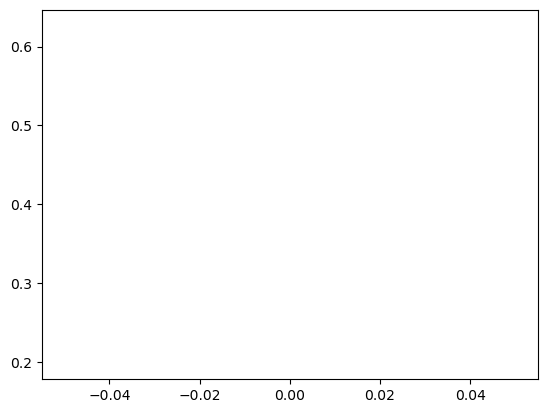

In [5]:
np.save('w2s_circle_Gibbs.npy',W2s)
mean_W2s = np.mean(W2s, axis=0)
std_W2s = np.std(W2s, axis=0)
index = np.arange(0, num_iterations, 4)
for index_nodes, num_nodes in enumerate([7,15,31,63]):
    line, = plt.plot(mean_W2s[index_nodes,:])
    plt.errorbar(index, mean_W2s[index_nodes,index], 
                 yerr=2*std_W2s[index_nodes,index], label=f'n={num_nodes}', fmt='o', color = line.get_color(),markersize=4)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('W2 distance')
plt.savefig('circle_Gibbs.pdf')
plt.show()
plt.close()

mean_slope = np.mean(slopes, axis=0)
std_slope = np.std(slopes, axis=0)
for i in range(len(mean_slope)):
    n = 2 ** (i+3)-1
    print(f'n:{int(n)}, mean_slope:{mean_slope[i]}')
    print(f'n:{int(n)}, 2_std_slope:{2*std_slope[i]}')
    
mean_min_W2 = np.mean(min_W2, axis=0)
std_min_W2 = np.std(min_W2, axis=0)
for i in range(len(mean_min_W2)):
    n = 2 ** (i+3)-1
    print(f'n:{int(i+3)}, mean_min_W2:{mean_min_W2[i]}')
    print(f'n:{int(i+3)}, 2_std_min_W2:{2*std_min_W2[i]}')

In [ ]:

            
# results = np.zeros([6,5])

# for seed in [0,1,2,3,4]:
#     np.random.seed(seed)
#     for num_dimensions in [2,4,8,16,32,64]:
#         eta = 0.005
        
#         num_layers = layer
#         num_distributions = 2 ** num_layers - 1
#         means = [np.zeros(num_dimensions) for _ in range(num_distributions)]
#         covariances = [np.identity(num_dimensions)+ np.diag(np.random.uniform(low=0, high=0.1, size = num_dimensions)) for _ in range(num_distributions)]
        
#         overall_mean, overall_cov = product_of_gaussians(means,covariances)

#         samples = gibbs_sampler_for_binary_tree(num_dimensions, num_iterations, num_layers, means, covariances)
        
        
#         projected_samples = np.einsum('ijk,kl->ijl', samples, direction).squeeze()
#         projected_root = projected_samples[:,0]
#         projected_real_samples = np.einsum('ik,kl->il', overall_samples, direction).squeeze()
#         plt.plot(projected_root)
#         plt.title('projected root')
#         plt.show()
#         TVs = []
#         for i in range(burn_in+everyK,num_iterations,everyK):
#             TVs.append(TV_estimation(projected_root[burn_in:i],projected_real_samples,20))
#         print(min(TVs))
#         plt.plot(TVs)
#         plt.show()
#         iteration = burn_in+everyK*(weak_detect(TVs,thres)+1) # if iteration = burn_in, then the TV is always larger than thres
#         print(f"dimensions:{num_dimensions}, thres:{thres}, index:{iteration}")
        
#         index_dimension = int(math.log2(num_dimensions)-1)
#         results[int(seed),index_dimension] = iteration
#     np.save('results.npy',results)
